In [1]:
# 递归搜索文件夹下的所有文件，添加到一个列表种
import os


def list_files(res, startpath, startStr, endStr):
    for root, dirs, files in os.walk(startpath):
        for name in files:
            if name.endswith(endStr) and name.startswith(startStr):
                if os.path.join(root, name) not in res:
                    res.append(os.path.join(root, name))
        for dir in dirs:
            list_files(res, os.path.join(root, dir), startStr, endStr)


In [3]:
src_dir = r'E:\paper\data\原始数据\中国统计年鉴output\中国统计年鉴2021\valueJson'
res = []
list_files(res, src_dir, '', '.json')



In [9]:
import json

result = []
for item in res:
  with open(item, 'r', encoding='utf-8') as file:
    result += json.load(file)

In [16]:
space_list = {}
for item in result:
  if item['space'] in space_list:
    space_list[item['space']] += 1
  else:
    space_list[item['space']] = 1
print(space_list)



{'中国': 186091, '北京': 3061, '天津': 3085, '河北': 3065, '山西': 3067, '内蒙古': 3014, '辽宁': 3101, '吉林': 3045, '黑龙江': 3047, '上海': 3078, '江苏': 3060, '浙江': 3087, '安徽': 3051, '福建': 3060, '江西': 3027, '山东': 3073, '河南': 3074, '湖北': 3087, '湖南': 3068, '广东': 3085, '广西': 3030, '海南': 2914, '重庆': 3149, '四川': 3107, '贵州': 3052, '云南': 3055, '西藏': 2753, '陕西': 3092, '甘肃': 3040, '青海': 2914, '宁夏': 2951}


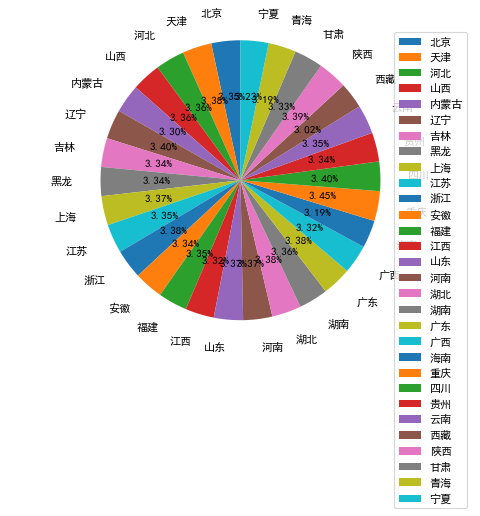

In [5]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(7.5, 5), dpi=80)  # 调节画布的大小
labels = ["北京", "天津", "河北", "山西", "内蒙古", "辽宁", "吉林", "黑龙", "上海", "江苏", "浙江", "安徽", "福建", "江西", "山东", "河南", "湖北", "湖南", "广东", "广西", "海南", "重庆", "四川", "贵州", "云南", "西藏", "陕西", "甘肃", "青海", "宁夏"]  # 定义各个扇形的面积/标签
sizes = [3061, 3085, 3065, 3067, 3014, 3101, 3045, 3047, 3078, 3060, 3087, 3051, 3060, 3027, 3073,
         3074, 3087, 3068, 3085, 3030, 2914, 3149, 3107, 3052, 3055, 2753, 3092, 3040, 2914, 2951]  # 各个值，影响各个扇形的面积
# colors = ['red', 'yellowgreen', 'lightskyblue', 'yellow',
#           'purple', 'pink', 'peachpuff', 'orange']  # 每块扇形的颜色
# explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
patches, text1, text2 = plt.pie(sizes,
                                # explode=explode,
                                labels=labels,
                                # colors=colors,
                                labeldistance=1.2,  # 图例距圆心半径倍距离
                                autopct='%3.2f%%',  # 数值保留固定小数位
                                shadow=False,  # 无阴影设置
                                startangle=90,  # 逆时针起始角度设置
                                pctdistance=0.6)  # 数值距圆心半径倍数距离
#patches饼图的返回值，texts1为饼图外label的文本，texts2为饼图内部文本
plt.axis('equal')
plt.legend()
plt.show()
